<a href="https://colab.research.google.com/github/EnFiore/ai-machine-learning-modelli-e-algoritmi/blob/main/6%20-%20Nearest%20Neighbors/nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmi Nearest Neighbors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [3]:
RANDOM_SEED = 0

## K-Nearest Neighbors

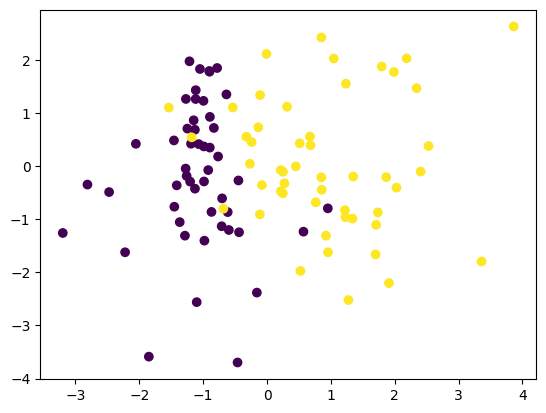

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=RANDOM_SEED)
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# solo un buon valore di k permette di avere un buon classificatore
Ks = [1,2,3,4,5,7,10,12,15,20,30,40,50]

for K in Ks:

    print("K="+str(K))
    knn = KNeighborsClassifier(n_neighbors=K) #si può decidere il valore di p per dare più peso alle distanze maggiori
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_prob_train = knn.predict_proba(X_train)

    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)

    loss_train = log_loss(y_train, y_prob_train)
    loss_test = log_loss(y_test, y_prob)

    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))


#il modello va subito in overfitting poi il modello migliore si ha con un valore di k = 5


K=1
ACCURACY: TRAIN=1.0000 TEST=0.8500
LOG LOSS: TRAIN=0.0000 TEST=5.4065
K=2
ACCURACY: TRAIN=0.9250 TEST=0.9500
LOG LOSS: TRAIN=0.1126 TEST=1.9062
K=3
ACCURACY: TRAIN=0.9375 TEST=0.9500
LOG LOSS: TRAIN=0.1498 TEST=1.8833
K=4
ACCURACY: TRAIN=0.9625 TEST=0.9500
LOG LOSS: TRAIN=0.1571 TEST=1.8741
K=5
ACCURACY: TRAIN=0.9500 TEST=0.9500
LOG LOSS: TRAIN=0.1771 TEST=1.8803
K=7
ACCURACY: TRAIN=0.9500 TEST=0.9500
LOG LOSS: TRAIN=0.2027 TEST=1.8821
K=10
ACCURACY: TRAIN=0.9250 TEST=0.9500
LOG LOSS: TRAIN=0.2391 TEST=0.2226
K=12
ACCURACY: TRAIN=0.8875 TEST=0.9500
LOG LOSS: TRAIN=0.2732 TEST=0.2411
K=15
ACCURACY: TRAIN=0.9000 TEST=0.9500
LOG LOSS: TRAIN=0.3035 TEST=0.2961
K=20
ACCURACY: TRAIN=0.9000 TEST=0.9500
LOG LOSS: TRAIN=0.3212 TEST=0.3365
K=30
ACCURACY: TRAIN=0.9000 TEST=0.9500
LOG LOSS: TRAIN=0.3794 TEST=0.3515
K=40
ACCURACY: TRAIN=0.8500 TEST=0.9500
LOG LOSS: TRAIN=0.4636 TEST=0.4582
K=50
ACCURACY: TRAIN=0.8500 TEST=0.9500
LOG LOSS: TRAIN=0.5293 TEST=0.5287


In [ ]:
#riclassifichiamo il modello con il valore di k migliore
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#si prova a fare una predizione
x = [0,0]
y_pred = knn.predict([x])
y_pred

array([1])

In [ ]:
#si estraggono i 5 neighbors e le distanze. Dei neighbors restituisce gli indici
distances, neighbors = knn.kneighbors([x])
neighbors

array([[10, 76,  0, 68, 15]])

In [ ]:
X_neighbors = X_train[neighbors][0]

In [ ]:
X_neighbors.shape

(5, 2)

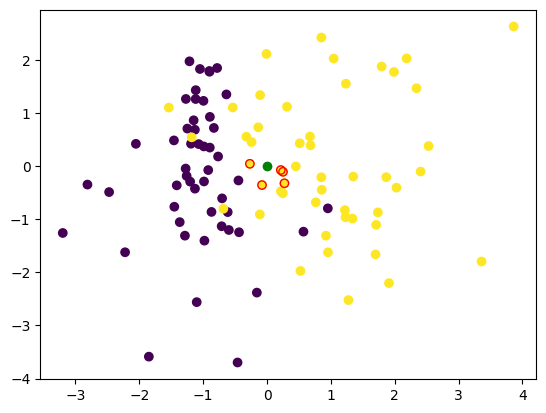

In [ ]:
#visualizzo, evidenziandoli, i 5 valori di neighbors
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(x[0], y[0], c="green")
plt.scatter(X_neighbors[:,0], X_neighbors[:,1], facecolors='none', edgecolors='r')

## Radius Nearest Neighbors
Ricorda che le feature devono essere normalizzate

In [7]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [12]:
from sklearn.neighbors import RadiusNeighborsClassifier
#provo diversi valori di raggio
Rs = [.2, .3, .4, .5, .6, .7, .8, .9, 1]

for R in Rs:

    print("Radius="+str(R))
    rnn = RadiusNeighborsClassifier(radius=R)
    rnn.fit(X_train_norm, y_train)

    y_pred_train = rnn.predict(X_train_norm)
    y_prob_train = rnn.predict_proba(X_train_norm)

    y_pred = rnn.predict(X_test_norm)
    y_prob = rnn.predict_proba(X_test_norm)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)

    loss_train = log_loss(y_train, y_prob_train)
    loss_test = log_loss(y_test, y_prob)

    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))


Radius=0.2
ACCURACY: TRAIN=0.9000 TEST=0.9500
LOG LOSS: TRAIN=0.3321 TEST=0.2916
Radius=0.3
ACCURACY: TRAIN=0.8750 TEST=0.9500
LOG LOSS: TRAIN=0.4177 TEST=0.4210
Radius=0.4
ACCURACY: TRAIN=0.9000 TEST=0.9000
LOG LOSS: TRAIN=0.4973 TEST=0.4935
Radius=0.5
ACCURACY: TRAIN=0.8750 TEST=0.8500
LOG LOSS: TRAIN=0.5618 TEST=0.5928
Radius=0.6
ACCURACY: TRAIN=0.6625 TEST=0.5500
LOG LOSS: TRAIN=0.6316 TEST=0.6547
Radius=0.7
ACCURACY: TRAIN=0.5875 TEST=0.5000
LOG LOSS: TRAIN=0.6595 TEST=0.6815
Radius=0.8
ACCURACY: TRAIN=0.5625 TEST=0.4500
LOG LOSS: TRAIN=0.6749 TEST=0.7024
Radius=0.9
ACCURACY: TRAIN=0.5625 TEST=0.3500
LOG LOSS: TRAIN=0.6819 TEST=0.7121
Radius=1
ACCURACY: TRAIN=0.5500 TEST=0.3500
LOG LOSS: TRAIN=0.6875 TEST=0.7166


In [13]:
r = .2
rnn = RadiusNeighborsClassifier(radius=r)
rnn.fit(X_train_norm, y_train)

RadiusNeighborsClassifier(radius=0.2)

In [16]:
x = [0,0]
#noramlizzo il valore da calssificare
x = mms.transform([x])
y_pred = rnn.predict(x)
y_pred

array([1])

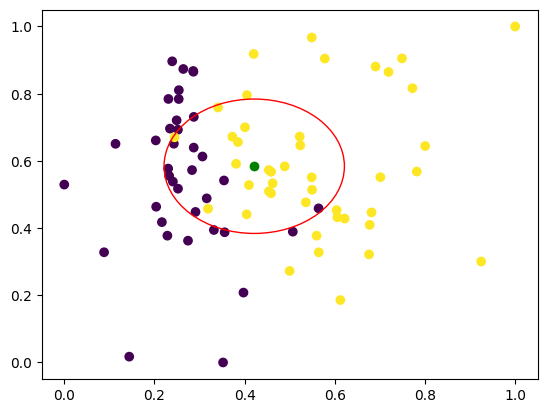

In [17]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

ax.scatter(X_train_norm[:,0], X_train_norm[:,1], c=y_train)
ax.scatter(x[0,0], x[0,1], c="green")
#aggiungo cerchio di raggio .2 con il centro le coordinate di X il valore da riclassificare
circle = plt.Circle((x[0,0], x[0,1]), r, color='r', fill=None)

ax.add_patch(circle)
plt.show()

In [18]:
#ricavo la probabilità che x sia classificato 0 o 1
rnn.predict_proba(x)

array([[0.39393939, 0.60606061]])